# Global Entities - Map Visualizer

#### Version 1.0

### TODO

- Plotly basic map plot
- Plotly with group level filter
- Plotly with entity filter for group
- Plotly lineplot/scatterplot/heatmap for selected entity
- Plotly Dash app

### Observations

## Setup

### Import Packages

In [55]:
from datetime import datetime, date
from pprint import pprint
from collections import OrderedDict
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Set ipython's max row display
# pd.set_option('display.max_row', 1000)
# Set iPython's max column width
pd.set_option('display.max_columns', 50)

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [20, 10]

### Functions

In [56]:
def masked_heatmap():
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    fig,ax = plt.subplots()
    sns.heatmap(corr,center = 0, fmt = ".3f", square = True, annot= True, mask=mask)

## Global Variables

#### Dataset Parameters

In [57]:
file_name = '../data/silver_tables/yearly_values_per_entity.csv'

year_range = [1960, 2022]
metric_agg = 'last_year'
metric_agg = 'growth_rate'
metric_agg = '?'

In [58]:
country_list = ['United Arab Emirates', 'Japan', 'Ghana'] #For country level analysis

In [59]:
key_columns = [
    'Annual CO2 emissions', 'Annual change in primary energy consumption (%)',
    'Per capita electricity (kWh)',
    'Fossil fuels per capita (kWh)', 'Fossil fuels (% equivalent primary energy)',
    'Renewables per capita (kWh - equivalent)', 'Renewables (% electricity)',
    'Solar Generation - TWh', 'prod of Electricity from solar (TWh)',
]

corr_columns = [
    'Annual CO2 emissions', 'Annual change in primary energy consumption (%)',
    'Per capita electricity (kWh)',
    'Fossil fuels per capita (kWh)',
    'Renewables per capita (kWh - equivalent)',
]

## Data Prep

In [60]:
df_original = pd.read_csv(file_name)

In [61]:
df_original = df_original.loc[
    (df_original['Year'] > year_range[0])
    & (df_original['Year'] < year_range[1])
]

In [62]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17013 entries, 12 to 27959
Data columns (total 38 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               17013 non-null  object 
 1   Year                                                 17013 non-null  int64  
 2   Code                                                 10529 non-null  object 
 3   Region                                               10407 non-null  object 
 4   Income group                                         10407 non-null  object 
 5   Lending category                                     7279 non-null   object 
 6   Fossil fuels (% equivalent primary energy)           6068 non-null   float64
 7   Fossil fuels (% growth)                              6034 non-null   float64
 8   Gas Production - TWh                                 4053 non-nul

In [63]:
df_original.head()

,Entity,Year,Code,Region,Income group,Lending category,Fossil fuels (% equivalent primary energy),Fossil fuels (% growth),Gas Production - TWh,Land area (sq. km),Unnamed: 0.1.1.1,Coal Consumption - TWh,Renewables per capita (kWh - equivalent),Wind Generation - TWh,prod of Other renewables including bioenergy (TWh),Fossil fuels per capita (kWh),Fossil fuels (TWh),Oil Production - TWh,Coal Production - TWh,Hydro Generation - TWh,Unnamed: 0.1.1,prod of Electricity from solar (TWh),prod of Electricity from hydro (TWh),Unnamed: 0.1,"Gas (TWh, direct energy)",Annual change in primary energy consumption (%),Geo Biomass Other - TWh,"Coal (TWh, direct energy)",Per capita electricity (kWh),Oil Consumption - TWh,Renewables (% electricity),Population density (people per sq. km of land area),Solar Generation - TWh,Gas Consumption - TWh,"Oil (TWh, direct energy)",Annual CO2 emissions,prod of Electricity from wind (TWh),Entity_Category
12,Afghanistan,1961,AFG,South Asia,Low income,IDA,NaN,NaN,NaN,652230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.058547,NaN,NaN,NaN,490798.0,NaN,Country
13,Afghanistan,1962,AFG,South Asia,Low income,IDA,NaN,NaN,NaN,652230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.337645,NaN,NaN,NaN,688594.0,NaN,Country
14,Afghanistan,1963,AFG,South Asia,Low income,IDA,NaN,NaN,NaN,652230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.631648,NaN,NaN,NaN,706736.0,NaN,Country
15,Afghanistan,1964,AFG,South Asia,Low income,IDA,NaN,NaN,NaN,652230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.940699,NaN,NaN,NaN,838551.0,NaN,Country
16,Afghanistan,1965,AFG,South Asia,Low income,IDA,NaN,NaN,NaN,652230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.265041,NaN,NaN,NaN,1006917.0,NaN,Country


In [64]:
df_original.describe()

,Year,Fossil fuels (% equivalent primary energy),Fossil fuels (% growth),Gas Production - TWh,Land area (sq. km),Unnamed: 0.1.1.1,Coal Consumption - TWh,Renewables per capita (kWh - equivalent),Wind Generation - TWh,prod of Other renewables including bioenergy (TWh),Fossil fuels per capita (kWh),Fossil fuels (TWh),Oil Production - TWh,Coal Production - TWh,Hydro Generation - TWh,Unnamed: 0.1.1,prod of Electricity from solar (TWh),prod of Electricity from hydro (TWh),Unnamed: 0.1,"Gas (TWh, direct energy)",Annual change in primary energy consumption (%),Geo Biomass Other - TWh,"Coal (TWh, direct energy)",Per capita electricity (kWh),Oil Consumption - TWh,Renewables (% electricity),Population density (people per sq. km of land area),Solar Generation - TWh,Gas Consumption - TWh,"Oil (TWh, direct energy)",Annual CO2 emissions,prod of Electricity from wind (TWh)
count,17013.000000,6068.000000,6034.000000,4053.000000,1.055900e+04,13164.000000,6134.000000,4862.000000,5939.000000,8899.000000,4840.000000,6068.000000,4408.000000,2500.000000,6153.000000,13164.000000,8939.000000,9170.000000,13164.000000,57.000000,12261.000000,5948.000000,57.000000,6220.000000,6160.000000,7008.000000,9717.000000,5924.000000,6094.000000,57.000000,1.372300e+04,8953.000000
mean,1992.379533,85.831892,3.317557,1775.709862,1.433329e+06,6581.873215,1625.004354,4.339072,13.805802,10.535739,31653.758962,5136.950645,3466.583599,3274.685893,136.736280,6581.873215,4.423860,105.856874,6581.873215,21492.190695,4.125264,12.445990,28584.640556,3950.509462,2228.388291,30.488270,161.785499,5.047541,1228.198540,39160.740543,4.750953e+08,12.191714
std,17.069374,14.603942,22.875763,4042.829666,9.901976e+06,3800.896830,4907.816698,12.693478,81.229086,45.642700,33092.712344,13737.030117,6955.447481,6908.166717,374.128795,3800.896830,37.610140,346.000705,3800.896830,9564.826179,27.879834,45.803265,10007.255369,5026.958829,5840.259523,30.934145,475.889730,38.265463,3413.741868,8988.199100,2.184178e+09,81.726038
min,1961.000000,12.804697,-49.590828,0.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,155.807388,0.097381,0.000000,0.339596,0.000000,0.000000,0.000000,0.000000,0.000000,6303.798828,-95.005081,0.000000,16060.809570,0.000000,0.097381,0.000000,0.098625,0.000000,0.000000,17989.603516,3.664000e+03,0.000000
25%,1978.000000,80.509890,-0.531910,44.498001,2.318000e+04,3290.750000,4.537538,0.208465,0.000000,0.000000,10325.921631,149.484257,100.963156,38.597149,1.389000,3290.750000,0.000000,0.100000,3290.750000,14118.032227,-0.349981,0.000000,20363.539062,596.250275,80.953899,3.552361,17.792095,0.000000,12.293094,33680.054688,6.998240e+05,0.000000
50%,1993.000000,90.139271,2.589911,192.537277,1.118900e+05,6581.500000,46.895945,0.899160,0.000000,0.020000,25337.834961,418.682419,467.141678,357.479385,10.712626,6581.500000,0.000000,3.565500,6581.500000,20265.484375,2.460420,0.201000,25963.681641,2502.079101,208.418251,18.145459,60.702633,0.000000,81.496605,38151.847656,7.081458e+06,0.000000
75%,2007.000000,96.528872,5.987856,992.275024,4.994600e+05,9872.250000,442.860115,3.228757,0.221320,1.333982,40323.159180,1808.173248,3527.187439,2806.387512,59.555000,9872.250000,0.010000,28.667310,9872.250000,29315.390625,6.231642,3.617000,40175.359375,5627.821900,999.276443,53.127329,138.575929,0.016565,429.343689,47172.609375,6.293776e+07,0.040000
max,2021.000000,100.000015,1553.104980,40368.828125,1.299870e+08,13180.000000,45161.207031,153.883406,1861.939819,762.782654,308704.218750,136131.468750,52181.949219,46550.605469,4345.990234,13180.000000,1032.501221,4345.990234,13180.000000,40374.605469,1553.104980,762.782654,45161.207031,56781.601560,53368.628906,100.000000,7965.878492,1032.501221,40374.605469,53368.628906,3.670250e+10,1861.939819


## Visualizations

### World

In [92]:
category_filter = "Country"

df = df_original.copy().loc[df_original['Entity_Category'] == category_filter]

In [93]:
df = df.loc[df['Year'] == 2020]

In [96]:
x = 'Code'
c = 'Entity'

# y = 'Renewables per capita (kWh - equivalent)'
y = 'Fossil fuels per capita (kWh)'

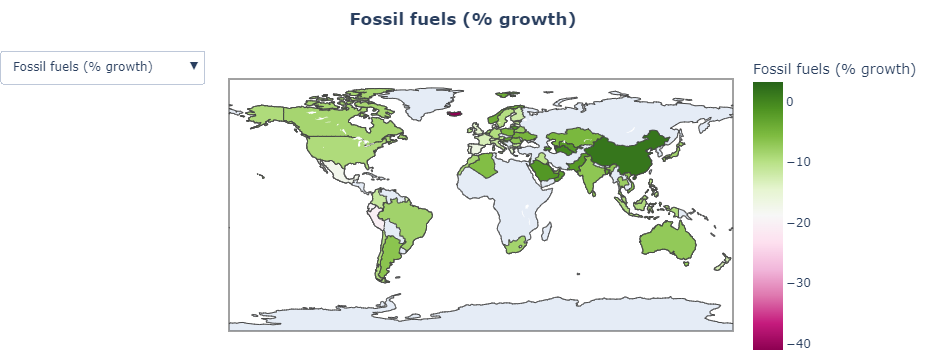

In [104]:
# Define data columns for the drop-down filter
cols_dd = ["Fossil fuels (% growth)", "Land area (sq. km)", "Per capita electricity (kWh)"]
# cols_dd = df_original.columns

# We need to add this to select which trace is going to be visible
visible = np.array(cols_dd)

# define traces and buttons at once
traces = []
buttons = []
for value in cols_dd:
    traces.append(go.Choropleth(locations=df[x], z=df[value], text=df[c], colorbar_title=value, visible=True if value==cols_dd[0] else False))

    buttons.append(dict(label=value, method="update", args=[{"visible":list(visible==value)}, {"title":f"<b>{value}</b>"}]))

updatemenus = [{"active":0, "buttons":buttons,}]

# Show figure
fig = go.Figure(data=traces, layout=dict(updatemenus=updatemenus))

# This is in order to get the first title displayed correctly
first_title = cols_dd[0]
fig.update_layout(title=f"<b>{first_title}</b>",title_x=0.5)

# Update layout margins to enhance the plot size and display
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

In [99]:
df.head()

,Entity,Year,Code,Region,Income group,Lending category,Fossil fuels (% equivalent primary energy),Fossil fuels (% growth),Gas Production - TWh,Land area (sq. km),Unnamed: 0.1.1.1,Coal Consumption - TWh,Renewables per capita (kWh - equivalent),Wind Generation - TWh,prod of Other renewables including bioenergy (TWh),Fossil fuels per capita (kWh),Fossil fuels (TWh),Oil Production - TWh,Coal Production - TWh,Hydro Generation - TWh,Unnamed: 0.1.1,prod of Electricity from solar (TWh),prod of Electricity from hydro (TWh),Unnamed: 0.1,"Gas (TWh, direct energy)",Annual change in primary energy consumption (%),Geo Biomass Other - TWh,"Coal (TWh, direct energy)",Per capita electricity (kWh),Oil Consumption - TWh,Renewables (% electricity),Population density (people per sq. km of land area),Solar Generation - TWh,Gas Consumption - TWh,"Oil (TWh, direct energy)",Annual CO2 emissions,prod of Electricity from wind (TWh),Entity_Category
71,Afghanistan,2020,AFG,South Asia,Low income,IDA,NaN,NaN,NaN,652230.0,12892.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,12892.0,0.040,0.6200,12892.0,NaN,NaN,NaN,NaN,20.014248,NaN,84.615395,59.684990,NaN,NaN,NaN,12160286.0,0.0000,Country
354,Albania,2020,ALB,Europe & Central Asia,Upper middle income,IBRD,NaN,NaN,NaN,27400.0,12893.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,12893.0,0.030,5.2800,12893.0,NaN,NaN,NaN,NaN,1852.207153,NaN,100.000000,103.571131,NaN,NaN,NaN,4534673.0,0.0000,Country
459,Algeria,2020,DZA,Middle East & North Africa,Lower middle income,IBRD,99.702103,-5.827147,814.563721,2381741.0,166.0,4.81635,0.044457,0.0077,0.0,14879.098633,652.463989,668.911072,NaN,0.0496,166.0,0.685,0.0496,166.0,NaN,-5.824166,0.0,NaN,1821.686035,211.635162,0.937777,18.411340,0.685,436.012512,NaN,154995460.0,0.0077,Country
500,American Samoa,2020,ASM,East Asia & Pacific,Upper middle income,NaN,NaN,NaN,NaN,200.0,12894.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,12894.0,0.000,0.0000,12894.0,NaN,NaN,NaN,NaN,3245.629150,NaN,0.000000,275.985000,NaN,NaN,NaN,NaN,0.0000,Country
531,Andorra,2020,AND,Europe & Central Asia,High income,NaN,NaN,NaN,NaN,470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.393617,NaN,NaN,NaN,466294.0,NaN,Country


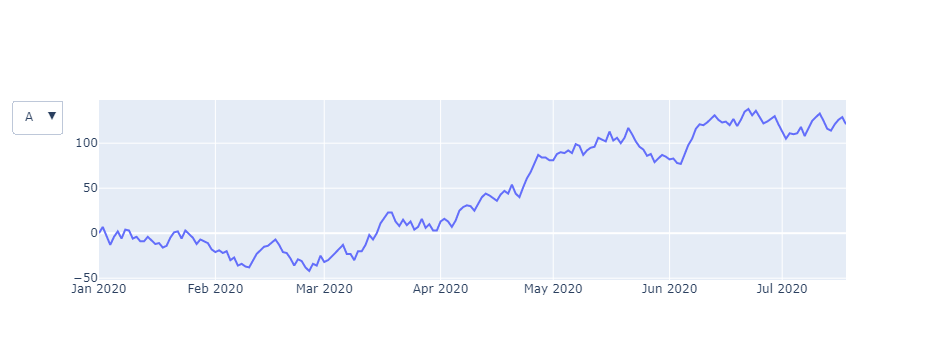

In [51]:
import datetime

NPERIODS = 200

np.random.seed(123)
df = pd.DataFrame(np.random.randint(-10, 12, size=(NPERIODS, 4)),
                  columns=list('ABCD'))
datelist = pd.date_range(datetime.datetime(2020, 1, 1).strftime('%Y-%m-%d'),
                         periods=NPERIODS).tolist()
df['dates'] = datelist 
df = df.set_index(['dates'])
df.index = pd.to_datetime(df.index)
df.iloc[0] = 0
df = df.cumsum()

# # plotly
fig = go.Figure()

# set up ONE trace
fig.add_trace(go.Scatter(x=df.index,
                         y=df[df.columns[0]],
                         visible=True)
             )

updatemenu = []
buttons = []

# button with one option for each dataframe
for col in df.columns:
    buttons.append(dict(method='restyle',
                        label=col,
                        visible=True,
                        args=[{'y':[df[col]],
                               'x':[df.index],
                               'type':'scatter'}, [0]],
                        )
                  )

# some adjustments to the updatemenus
updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

# add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=updatemenu)
fig.show()